# Decline curve analysis (DCA)
Arps (1945)

                                        𝑞=𝑞𝑖/[(1+𝑏∗𝑑𝑖∗𝑡)^(1/𝑏)]
 
Where q is the production rate (STB/day or SCF/day), t is the time (days), qi is the initial production rate (same unit as q), di is the initial decline rate (same unit as q), and b is the decline exponent. This decline function is known as the hyperbolic decline function.  

Based on the value of b in the function, he then classified the decline curves into three types:  
1) The exponential decline has b equals 0.  
2) The harmonic decline has b equals 1.  
3)The hyperbolic decline has b ranges between 0 and 1.


Ref: https://www.linkedin.com/pulse/decline-curve-analysis-python-yohanes-nuwara

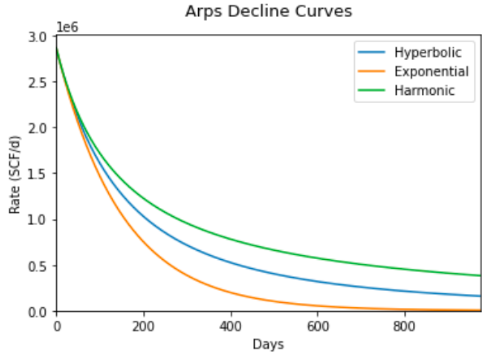

In [1]:
# Import libraries and Global Settings
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import beta
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 14}) # Global command must set in top

In [2]:
# Create a function to do descriptive statistics
def my_stats(var):
    import numpy as np
    from scipy.stats import skew
    from scipy.stats import kurtosis
    from scipy import stats
    print('Descriptive Statistics')
    print('mean:   ','{: ,.4f}'.format(np.mean(var)))
    print('sem:    ','{: ,.4f}'.format(stats.sem(var)))
    print('median: ','{: ,.4f}'.format(np.median(var)))
    print('min:    ','{: ,.4f}'.format(np.min(var)))
    print('max:    ','{: ,.4f}'.format(np.max(var)))
    print('stdev:  ','{: ,.4f}'.format(np.std(var)))
    print('skew:   ','{: ,.4f}'.format(skew(var)))
    print('kurt:   ','{: ,.4f}'.format(kurtosis(var)))
    print('p05:    ','{: ,.4f}'.format(np.percentile(var,5)))
    print('p50:    ','{: ,.4f}'.format(np.percentile(var,50)))
    print('p95:    ','{: ,.4f}'.format(np.percentile(var,95)))
    print('Count   ','{: ,.0f}'.format(np.size(var)))

## Import Data

In [3]:
# load data
df = pd.read_csv('/Users/davidadvocate/Documents/Python/Data/norne_production_rate_sample.csv')
# convert date string to Panda datetime format
df['Date'] =  pd.to_datetime(df['Date'], format='%Y-%m-%d') 

t = df['Date']
q = df['Rate (SCF/d)']

# display the data
df

,Date,Rate (SCF/d)
0,2004-04-01,2706039.00
1,2004-05-01,2492086.20
2,2004-06-02,1816846.10
3,2004-07-02,1920207.40
4,2004-07-04,1683521.40
...,...,...
59,2006-11-01,289382.91
60,2006-11-09,293290.66
61,2006-11-11,293359.31
62,2006-11-17,351398.16


In [4]:
print(t , q)

0    2004-04-01
1    2004-05-01
2    2004-06-02
3    2004-07-02
4    2004-07-04
        ...    
59   2006-11-01
60   2006-11-09
61   2006-11-11
62   2006-11-17
63   2006-12-01
Name: Date, Length: 64, dtype: datetime64[ns] 0     2706039.00
1     2492086.20
2     1816846.10
3     1920207.40
4     1683521.40
         ...    
59     289382.91
60     293290.66
61     293359.31
62     351398.16
63     351398.16
Name: Rate (SCF/d), Length: 64, dtype: float64


## Convert Date to days

In [5]:
import datetime

# subtract one datetime to another datetime
timedelta = [j-i for i, j in zip(t[:-1], t[1:])]
timedelta = np.array(timedelta)
timedelta = timedelta / datetime.timedelta(days=1)

# take cumulative sum over timedeltas
t = np.cumsum(timedelta)
t = np.append(0, t)
t = t.astype(float)
print(t)

[  0.  30.  62.  92.  94. 115. 122. 137. 138. 156. 172. 183. 214. 247.
 279. 289. 303. 307. 338. 357. 358. 367. 391. 397. 427. 428. 452. 456.
 466. 473. 485. 488. 490. 491. 519. 534. 552. 587. 610. 611. 640. 642.
 659. 674. 696. 702. 735. 760. 767. 795. 822. 853. 867. 868. 883. 896.
 913. 922. 927. 944. 952. 954. 960. 974.]


## Chart SCF/D vs Days

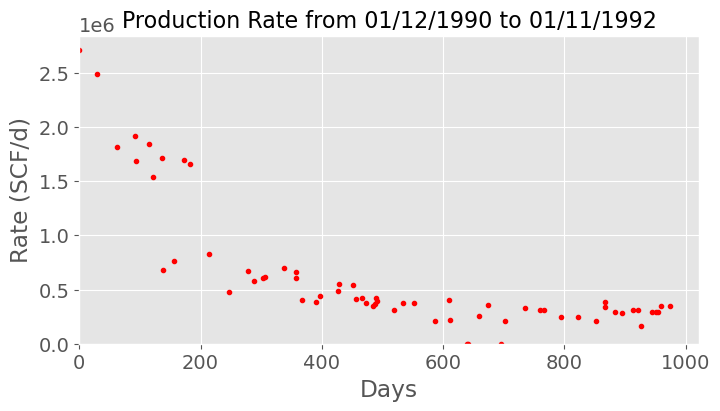

In [6]:
fig = plt.subplots(figsize=(8,4))
plt.plot(t, q, '.', color='red')
plt.title('Production Rate from 01/12/1990 to 01/11/1992', fontsize=16)
plt.xlabel('Days')
plt.ylabel('Rate (SCF/d)')
plt.xlim(xmin=0); plt.ylim(ymin=0)

plt.show()

## Normalize SCF/D and Days form 0 to 1

Text(0.5, 1.0, 'Normalized Rate vs Time')

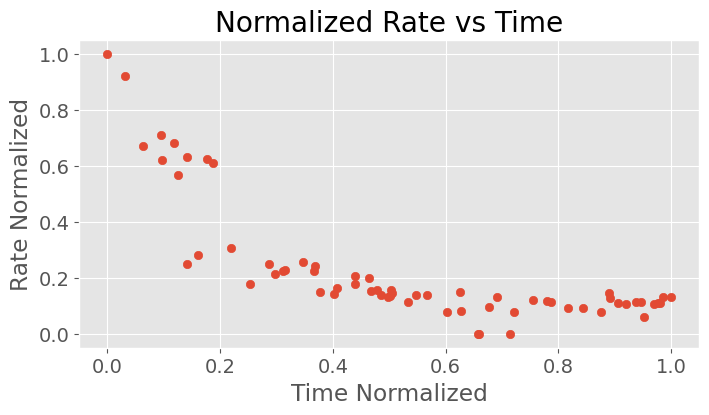

In [7]:
# normalize the time and rate data
t_normalized = t / max(t)
q_normalized = q / max(q)

fig = plt.subplots(figsize=(8,4))
plt.scatter(t_normalized, q_normalized)
plt.xlabel('Time Normalized')
plt.ylabel('Rate Normalized')
plt.title('Normalized Rate vs Time')

## Arp's Hyperbolic Equation and curve fit

In [8]:
# function for hyperbolic decline

from scipy.optimize import curve_fit

def hyperbolic(t, qi, di, b):
  return qi / (np.abs((1 + b * di * t))**(1/b))

# fitting the data with the hyperbolic function
popt, pcov = curve_fit(hyperbolic, t_normalized, q_normalized)

###  Examine Three Curve Fit Parameters:
qi = Intial Production Rate (SCF/D)  
di = Initial Decline Rate (SCF/D)  
b  = Decline Coefficient (unitless)

In [9]:
# Examine Curve fit paratmeters qi, di and b
popt

array([1.05921107, 6.51659049, 0.50002665])

It takes less than a second. Now, we need to pay attention to. What we are going to do is to "de-normalize" our resulted parameters, since we do the regression on the normalized data. After a simple mathematical operation, the "de-normalized" version of the hyperbolic function looks like this.

              q = (qi * qmax) / [[(1 + b * (di/tmax) * t)]^(1/b)]

No alt text provided for this image
Hence, we need to multiply the resulted qi with the maximum value of q (or qmax), and to divide the resulted di with the maximum value of t (or tmax). After that, we print all the fitted parameters.



## De-Normalize Data

In [10]:
qi, di, b = popt

# de-normalize qi and di
qi = qi * max(q)
di = di / max(t)

print('Initial production rate:', np.round(qi, 3), 'MMSCF')
print('Initial decline rate:', np.round(di, 3), 'SCF/D')
print('Decline coefficient:', np.round(b, 3))

Initial production rate: 2866266.464 MMSCF
Initial decline rate: 0.007 SCF/D
Decline coefficient: 0.5


We obtain the initial production rate equals 2.86 MMSCF per day, the initial decline rate equals 0.07 SCF per day, and most importantly the decline exponent equals 0.5. We are always interested to forecast how our production rate and cumulative production until 1,500 days will be. So next, this will be our task.
<div>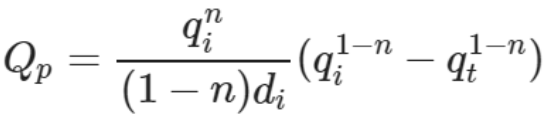<div>

No alt text provided for this image
The above equation is to calculate cumulative production (Qp). We create the function first.

## Forcast Cumulative Production

In [11]:
# function for hyperbolic cumulative production
def cumpro(q_forecast, qi, di, b):
  return (((qi**b) / ((1 - b) * di)) * ((qi ** (1 - b)) - (q_forecast ** (1 - b))))  

In [12]:
# forecast gas rate until 1,500 days
t_forecast = np.arange(1501)
q_forecast = hyperbolic(t_forecast, qi, di, b)

# forecast cumulative production until 1,500 days
Qp_forecast = cumpro(q_forecast, qi, di, b)

## Chart Production and forcast

Forcasted Total Produced SCF Gas after 1,500 Days:  714,451,376


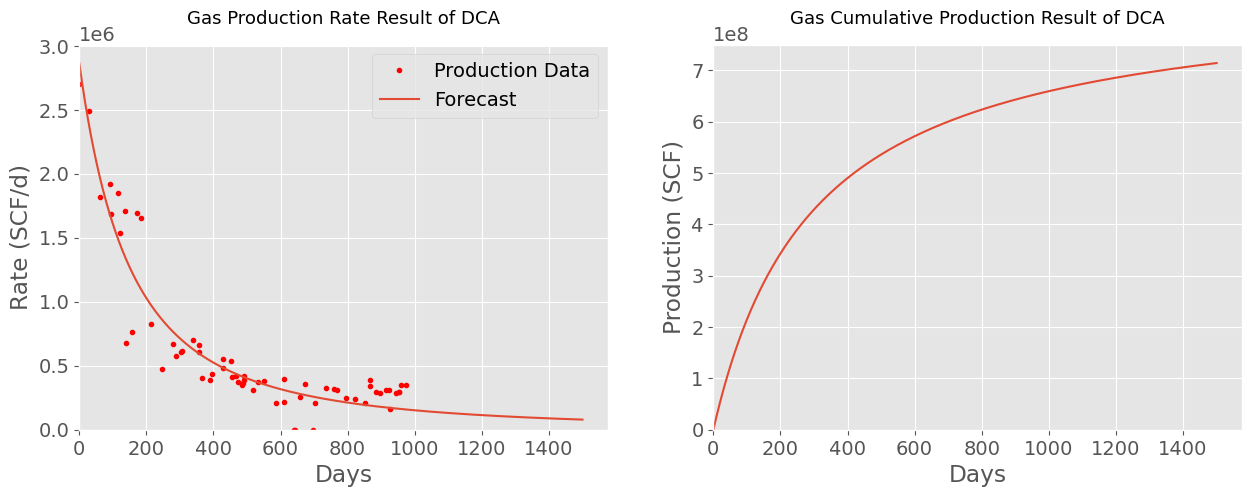

In [13]:
# plot the production data with the forecasts (rate and cum. production)
print('Forcasted Total Produced SCF Gas after 1,500 Days:','{: ,.0f}'.format(np.max(Qp_forecast)))

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(t, q, '.', color='red', label='Production Data')
plt.plot(t_forecast, q_forecast, label='Forecast')
plt.title('Gas Production Rate Result of DCA', size=13, pad=15)
plt.xlabel('Days')
plt.ylabel('Rate (SCF/d)')
plt.xlim(xmin=0); plt.ylim(ymin=0)
plt.legend()

plt.subplot(1,2,2)
plt.plot(t_forecast, Qp_forecast)
plt.title('Gas Cumulative Production Result of DCA', size=13, pad=15)
plt.xlabel('Days')
plt.ylabel('Production (SCF)')
plt.xlim(xmin=0); plt.ylim(ymin=0)

plt.show()
